In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go
import plotly.express as px
import plotly.io as pio
import seaborn as sns

In [2]:
df1= pd.read_csv('C:\\Users\\sshar127\\Desktop\\Python\\Udemy 2\\covid.csv')

In [3]:
df1.head()

Country/Region      Continent    Population  TotalCases  NewCases  \
0            USA  North America  3.311981e+08     5032179       NaN   
1         Brazil  South America  2.127107e+08     2917562       NaN   
2          India           Asia  1.381345e+09     2025409       NaN   
3         Russia         Europe  1.459409e+08      871894       NaN   
4   South Africa         Africa  5.938157e+07      538184       NaN   

   TotalDeaths  NewDeaths  TotalRecovered  NewRecovered  ActiveCases  \
0     162804.0        NaN       2576668.0           NaN    2292707.0   
1      98644.0        NaN       2047660.0           NaN     771258.0   
2      41638.0        NaN       1377384.0           NaN     606387.0   
3      14606.0        NaN        676357.0           NaN     180931.0   
4       9604.0        NaN        387316.0           NaN     141264.0   

   Serious,Critical  Tot Cases/1M pop  Deaths/1M pop  TotalTests  \
0           18296.0           15194.0          492.0  63139605.0   
1            8318.0           13716.0          464.0  13206188.0   
2            8944.0            1466.0           30.0  22149351.0   
3            2300.0            5974.0          100.0  29716907.0   
4             539.0            9063.0          162.0   3149807.0   

   Tests/1M pop      WHO Region iso_alpha  
0      190640.0        Americas       USA  
1       62085.0        Americas       BRA  
2       16035.0  South-EastAsia       IND  
3      203623.0          Europe       RUS  
4       53044.0          Africa       ZAF

In [4]:
df2= pd.read_csv('C:\\Users\\sshar127\\Desktop\\Python\\Udemy 2\\covid_grouped.csv')
df2.head()

Date Country/Region  Confirmed  Deaths  Recovered  Active  New cases  \
0  2020-01-22    Afghanistan          0       0          0       0          0   
1  2020-01-22        Albania          0       0          0       0          0   
2  2020-01-22        Algeria          0       0          0       0          0   
3  2020-01-22        Andorra          0       0          0       0          0   
4  2020-01-22         Angola          0       0          0       0          0   

   New deaths  New recovered             WHO Region iso_alpha  
0           0              0  Eastern Mediterranean       AFG  
1           0              0                 Europe       ALB  
2           0              0                 Africa       DZA  
3           0              0                 Europe       AND  
4           0              0                 Africa       AGO

In [6]:
# Removing new data
df1.drop(['NewCases','NewDeaths', 'NewRecovered'], axis=1, inplace=True)
df1.head()

Country/Region      Continent    Population  TotalCases  TotalDeaths  \
0            USA  North America  3.311981e+08     5032179     162804.0   
1         Brazil  South America  2.127107e+08     2917562      98644.0   
2          India           Asia  1.381345e+09     2025409      41638.0   
3         Russia         Europe  1.459409e+08      871894      14606.0   
4   South Africa         Africa  5.938157e+07      538184       9604.0   

   TotalRecovered  ActiveCases  Serious,Critical  Tot Cases/1M pop  \
0       2576668.0    2292707.0           18296.0           15194.0   
1       2047660.0     771258.0            8318.0           13716.0   
2       1377384.0     606387.0            8944.0            1466.0   
3        676357.0     180931.0            2300.0            5974.0   
4        387316.0     141264.0             539.0            9063.0   

   Deaths/1M pop  TotalTests  Tests/1M pop      WHO Region iso_alpha  
0          492.0  63139605.0      190640.0        Americas       USA  
1          464.0  13206188.0       62085.0        Americas       BRA  
2           30.0  22149351.0       16035.0  South-EastAsia       IND  
3          100.0  29716907.0      203623.0          Europe       RUS  
4          162.0   3149807.0       53044.0          Africa       ZAF

In [7]:
from plotly.figure_factory import create_table
table=create_table(df1.head(10), colorscale='blues')
py.iplot(table)

In [8]:
px.bar(df1.head(10), x='Country/Region', y='TotalCases', color='Country/Region', height=500, hover_data=['Country/Region', 'Continent'])

In [9]:
px.bar(df1.head(10), x='TotalTests', y='Country/Region', color='TotalTests', orientation='h',height=500, hover_data=['Country/Region', 'Continent'])

In [ ]:
#px.bar(df2, x="Date", y="Confirmed", color="Confirmed", hover_data=["Confirmed", "Date", "Country/Region"], height=400)

In [34]:
df_india= df2.loc[df2['Country/Region']== 'India']
df_india.head()

Date Country/Region  Confirmed  Deaths  Recovered  Active  \
79   2020-01-22          India          0       0          0       0   
266  2020-01-23          India          0       0          0       0   
453  2020-01-24          India          0       0          0       0   
640  2020-01-25          India          0       0          0       0   
827  2020-01-26          India          0       0          0       0   

     New cases  New deaths  New recovered       WHO Region iso_alpha  
79           0           0              0  South-East Asia       IND  
266          0           0              0  South-East Asia       IND  
453          0           0              0  South-East Asia       IND  
640          0           0              0  South-East Asia       IND  
827          0           0              0  South-East Asia       IND

In [15]:
px.bar(df_india, x='Date', y='New cases', height=400)

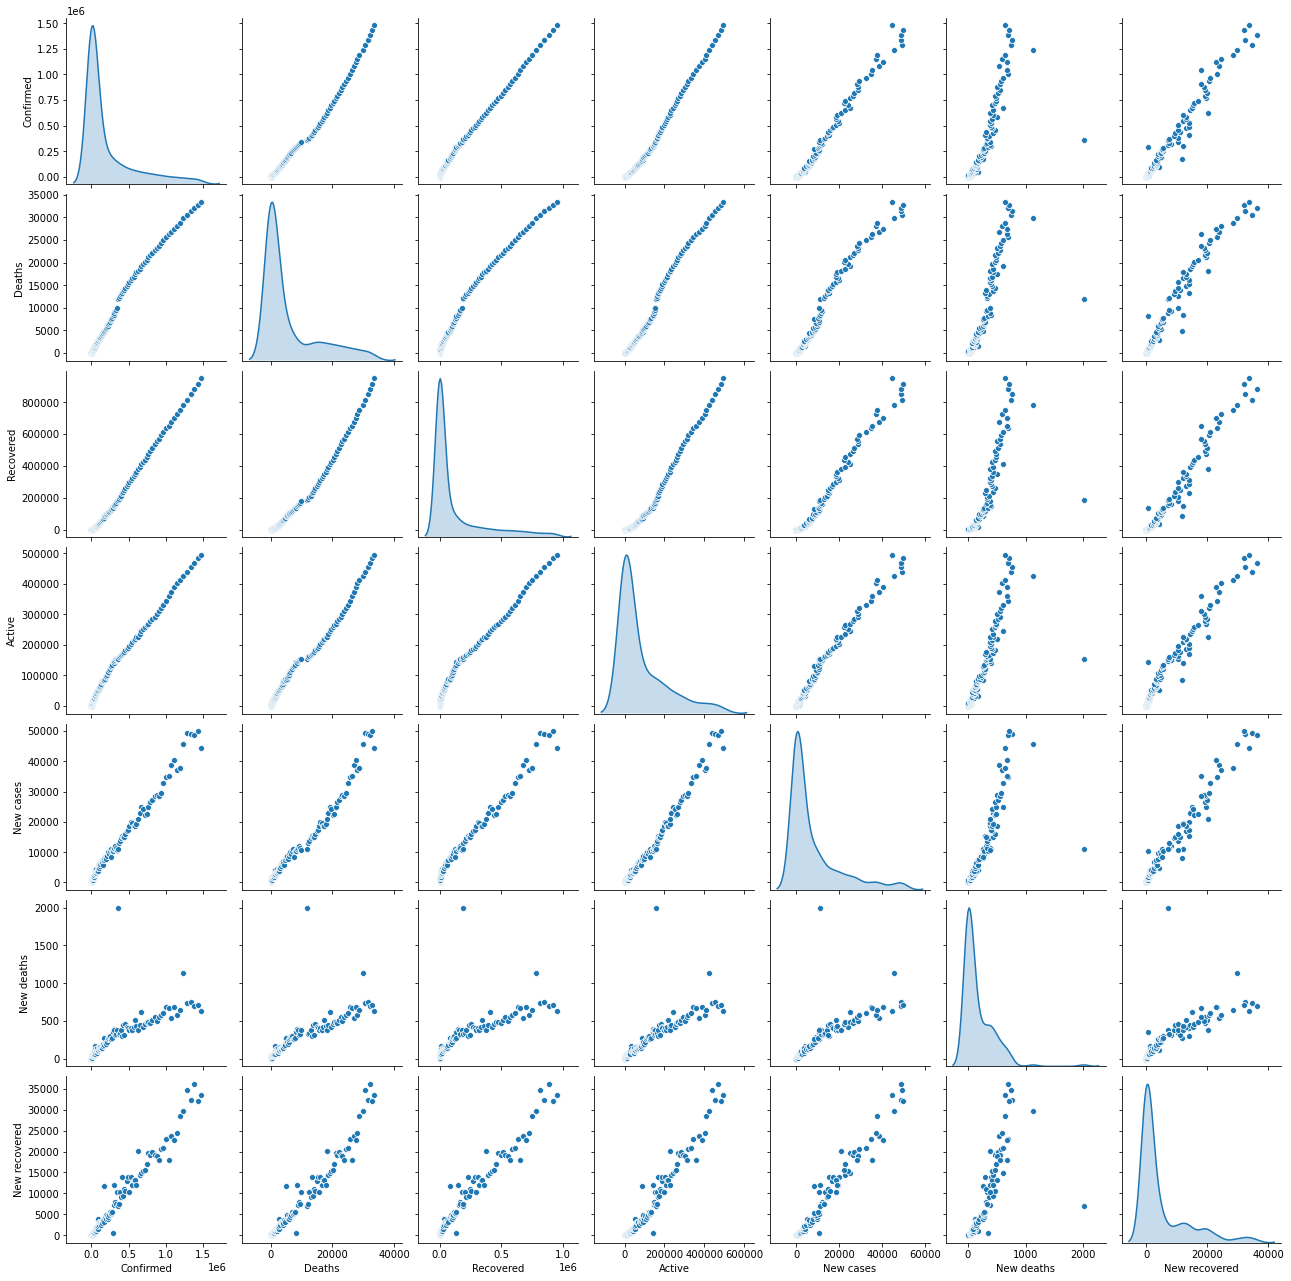

In [20]:
sns.pairplot(df_india[['Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases', 'New deaths', 'New recovered']],diag_kind='kde');

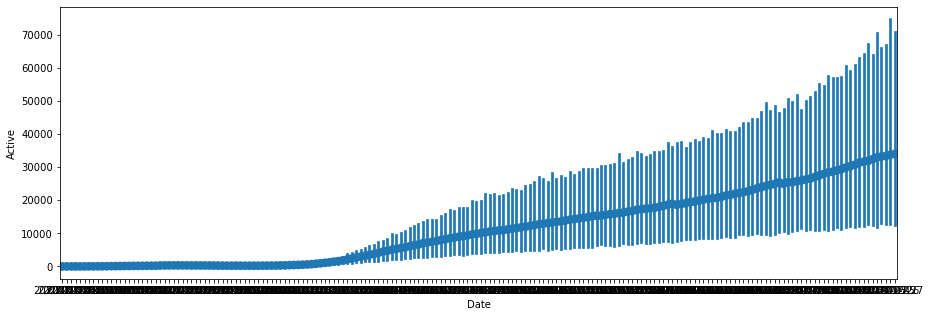

In [23]:
plt.subplots(figsize=(15,5))
sns.pointplot(x=df2['Date'], y=df2['Active']);

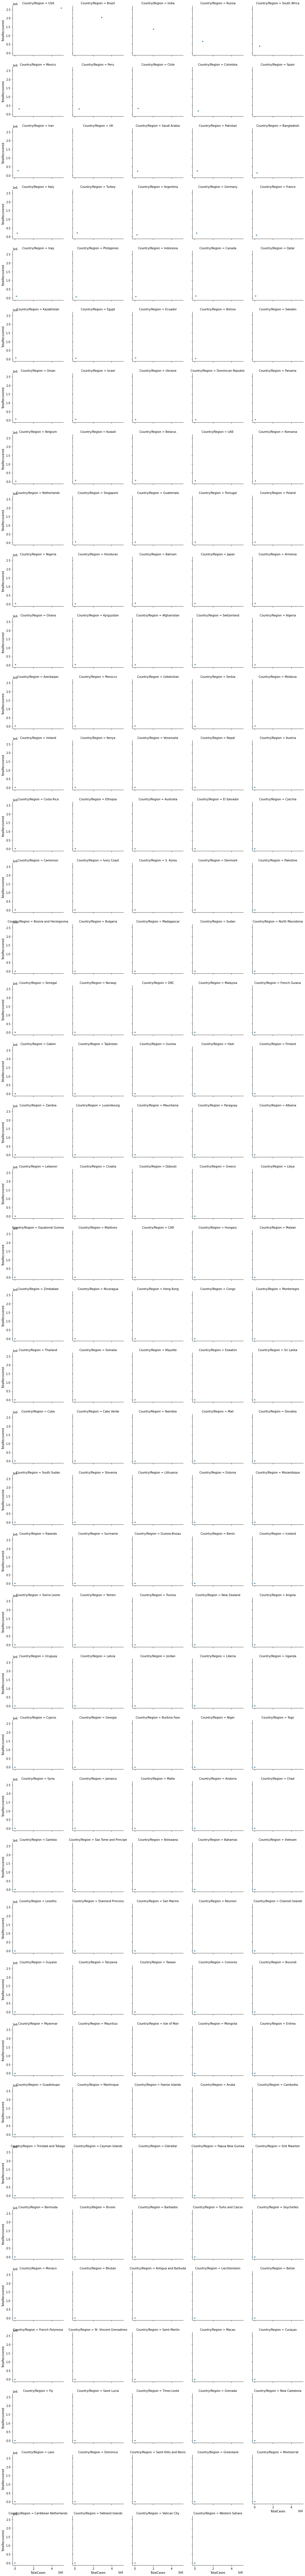

In [24]:
g = sns.FacetGrid(df1, col='Country/Region', col_wrap=5, height=3)
g = g.map(plt.plot, 'TotalCases', 'TotalRecovered', marker= '.')

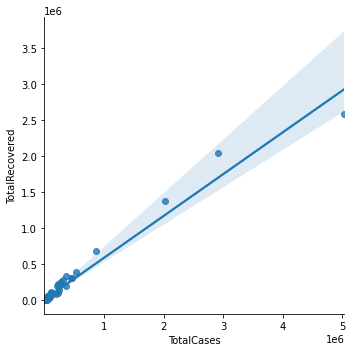

In [26]:
sns.lmplot(x= 'TotalCases', y= 'TotalRecovered', data=df1);

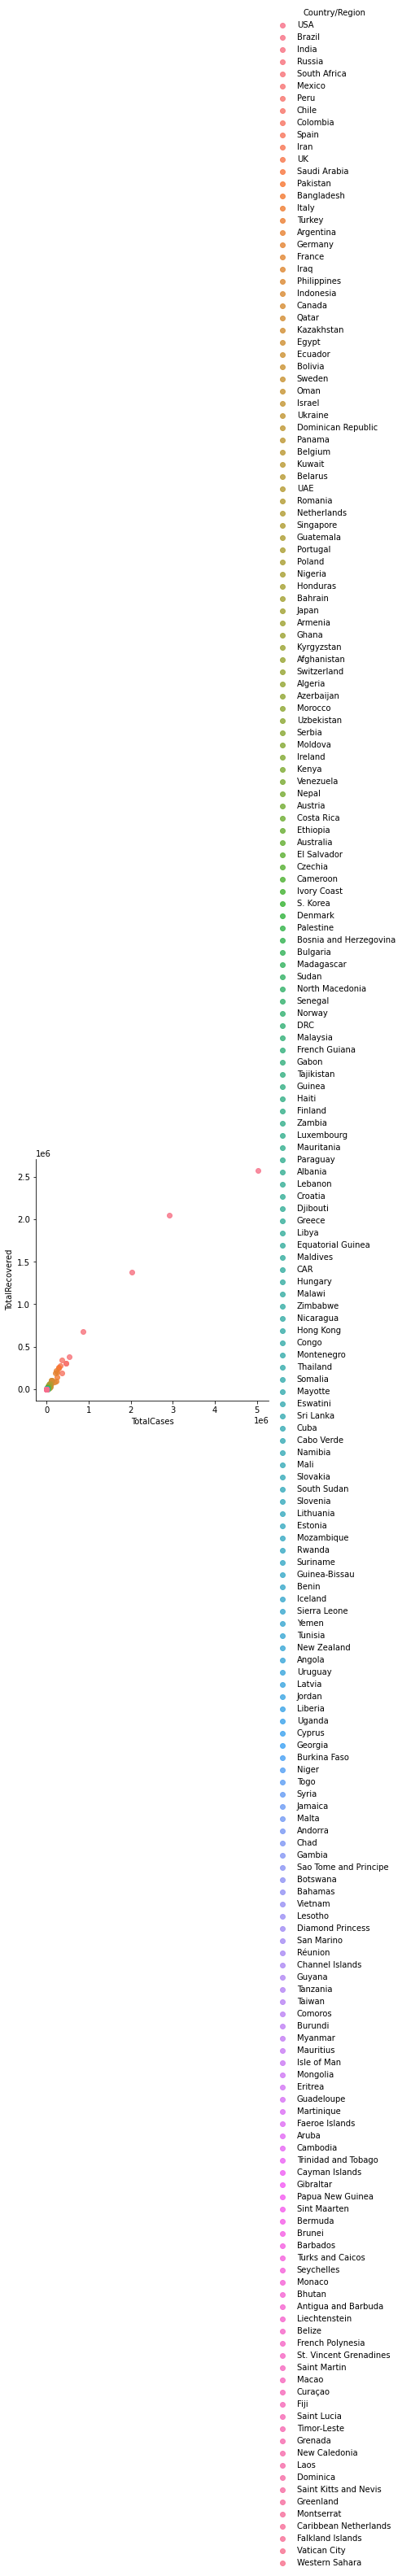

In [28]:
sns.lmplot(x='TotalCases', y='TotalRecovered', data=df1, hue='Country/Region');

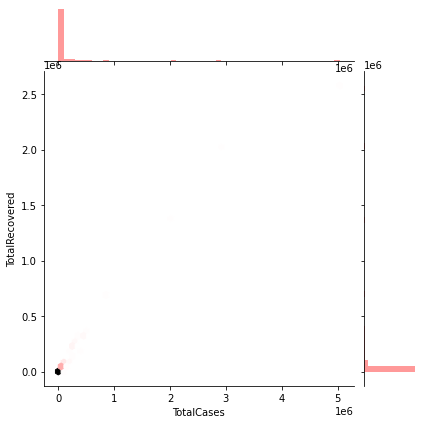

In [30]:
sns.jointplot(df1['TotalCases'], df1['TotalRecovered'], color='red', kind = 'hex')

In [ ]:
#px.bar(df_india, x="Date", y="New cases", height=400)

In [36]:
px.choropleth(df2,
              locations='iso_alpha',
              color="Deaths",
              hover_name="Country/Region",
              color_continuous_scale="Viridis",
              projection="orthographic",
              animation_frame="Date" )

In [ ]:
px.choropleth(df2,
              locations='iso_alpha',
              color="Deaths",
              hover_name="Country/Region",
              color_continuous_scale="Viridis",
              projection="orthographic",
              animation_frame="Date" )